In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
wine_df = pd.read_csv('/content/sample_data/winequality-red.csv')

In [5]:
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
wine_df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [7]:

wine_df.shape

(1599, 12)

In [8]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
wine_df['chlorides'].describe()

count    1599.000000
mean        0.087467
std         0.047065
min         0.012000
25%         0.070000
50%         0.079000
75%         0.090000
max         0.611000
Name: chlorides, dtype: float64

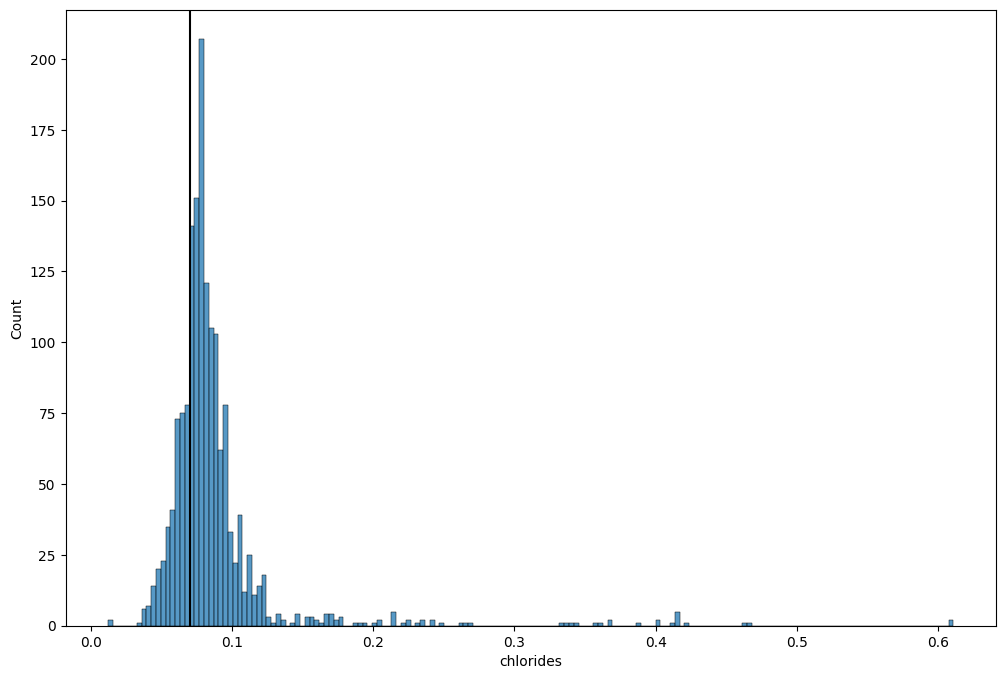

In [11]:
### histplot
plt.figure(figsize=(12,8))
sns.histplot(data=wine_df,x= 'chlorides')
plt.axvline( 0.070000,color='black')

In [12]:
feature_= wine_df.columns[:-1]
def get_percentile(feature,q_range):
    dist = wine_df[feature].describe()[str(q_range)+'%']
    return round(dist,2)
def counterplots():
    fig = plt.figure(figsize=(18,20))
    for column, feature in enumerate(feature_):
        fig.add_subplot(4,3,column+1)
        q1 = get_percentile(feature,25)
        q2 = get_percentile(feature,50)
        q3 = get_percentile(feature,75)
        sns.histplot(data=wine_df,x=feature, kde=True,color='orange')
        plt.axvline( q1,color='black',label='Q1')
        plt.axvline( q2,color='green',label='Q2')
        plt.axvline( q3,color='red',label='Q3')
        plt.legend()


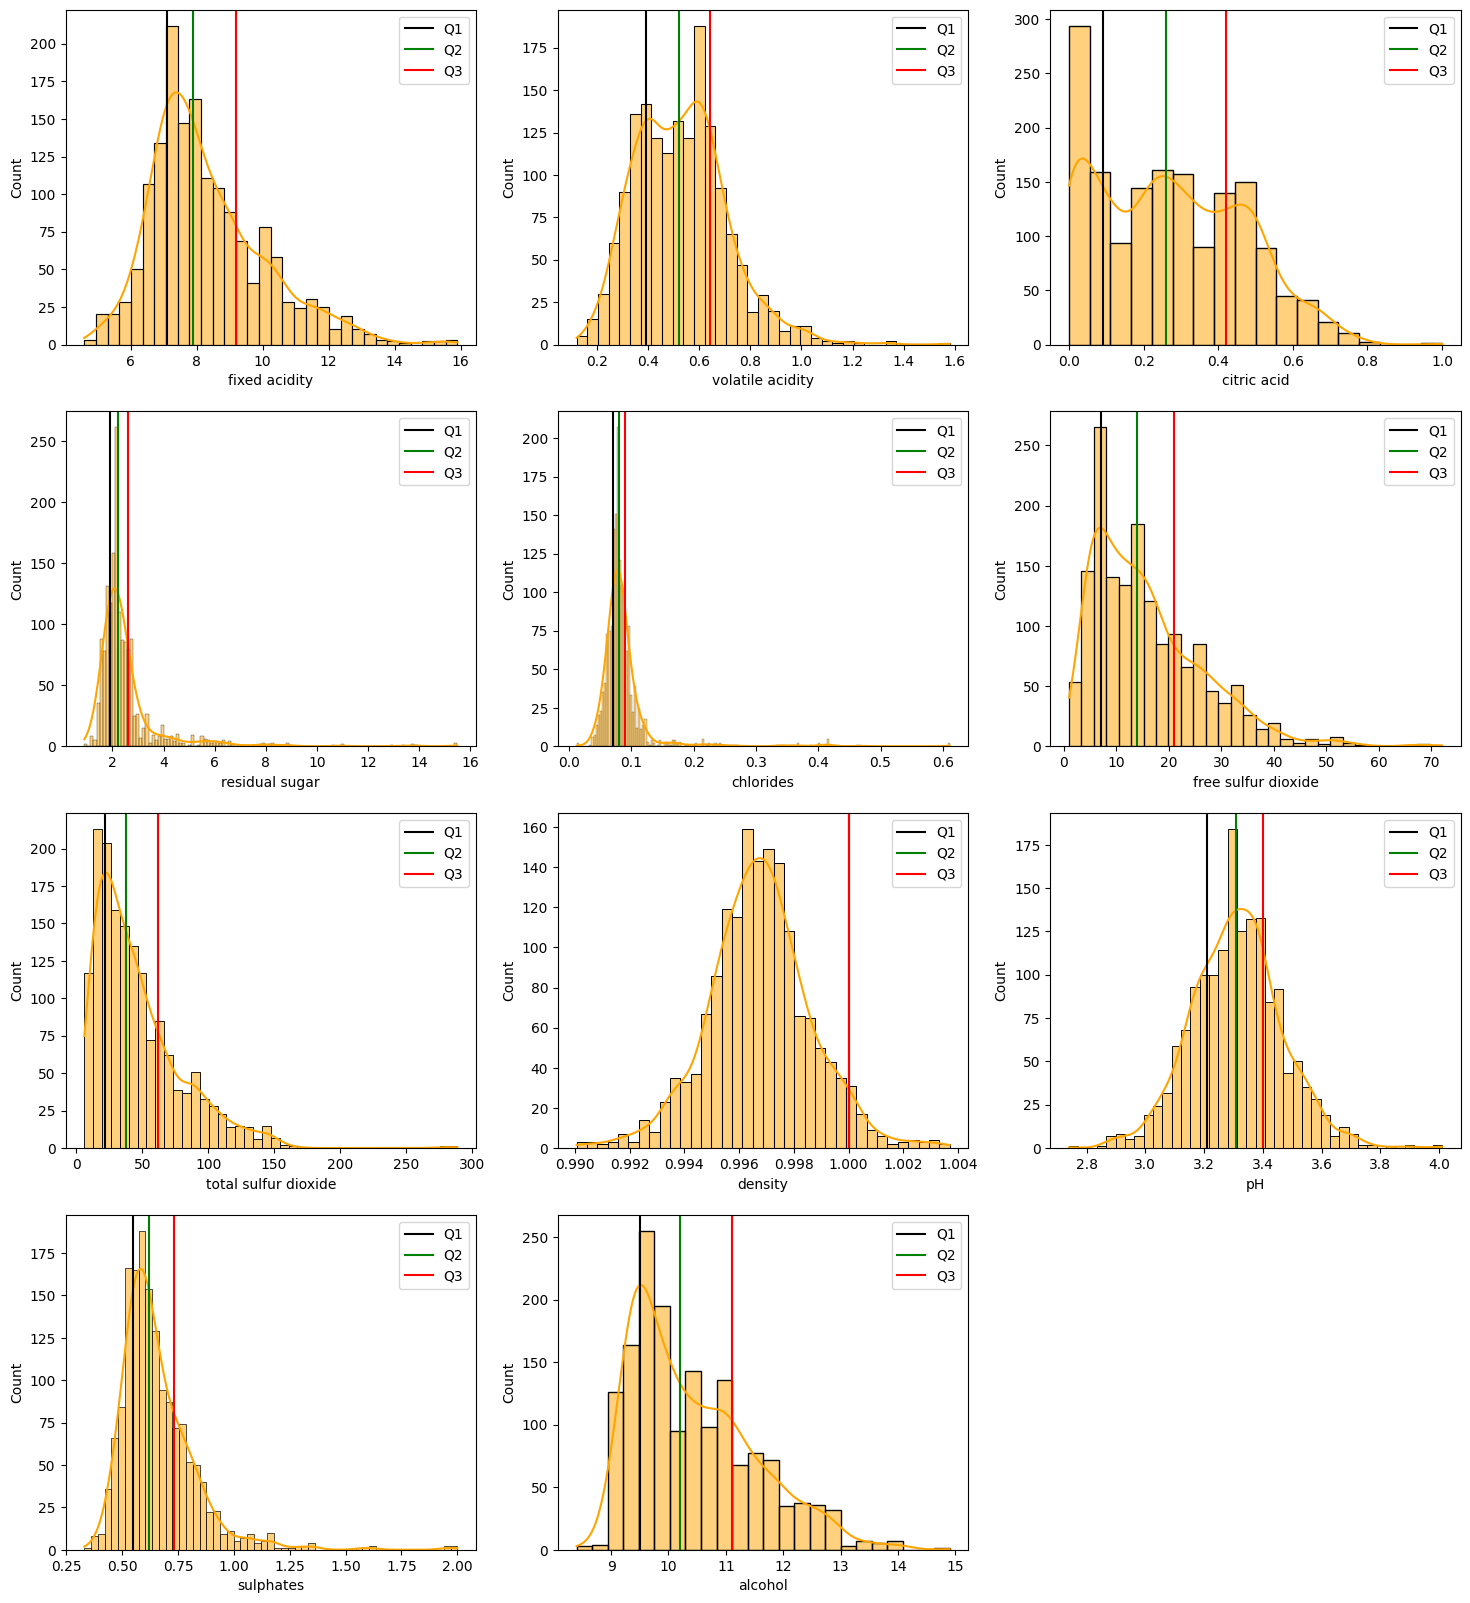

In [13]:
counterplots()

Text(0, 0.5, 'count')

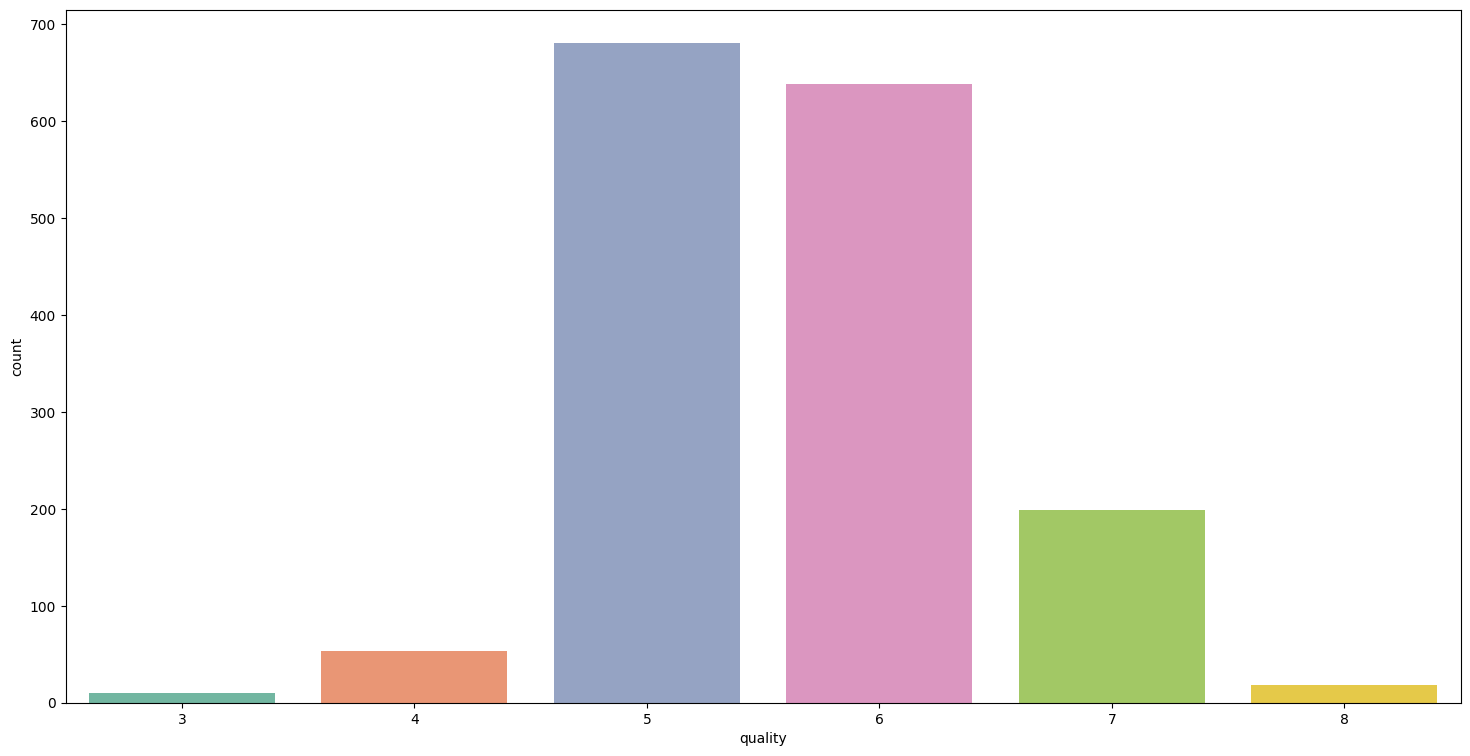

In [14]:
plt.figure(figsize=(18,9))
ax1 = sns.countplot(x='quality',data=wine_df,palette='Set2')
plt.xlabel('quality')
plt.ylabel('count')

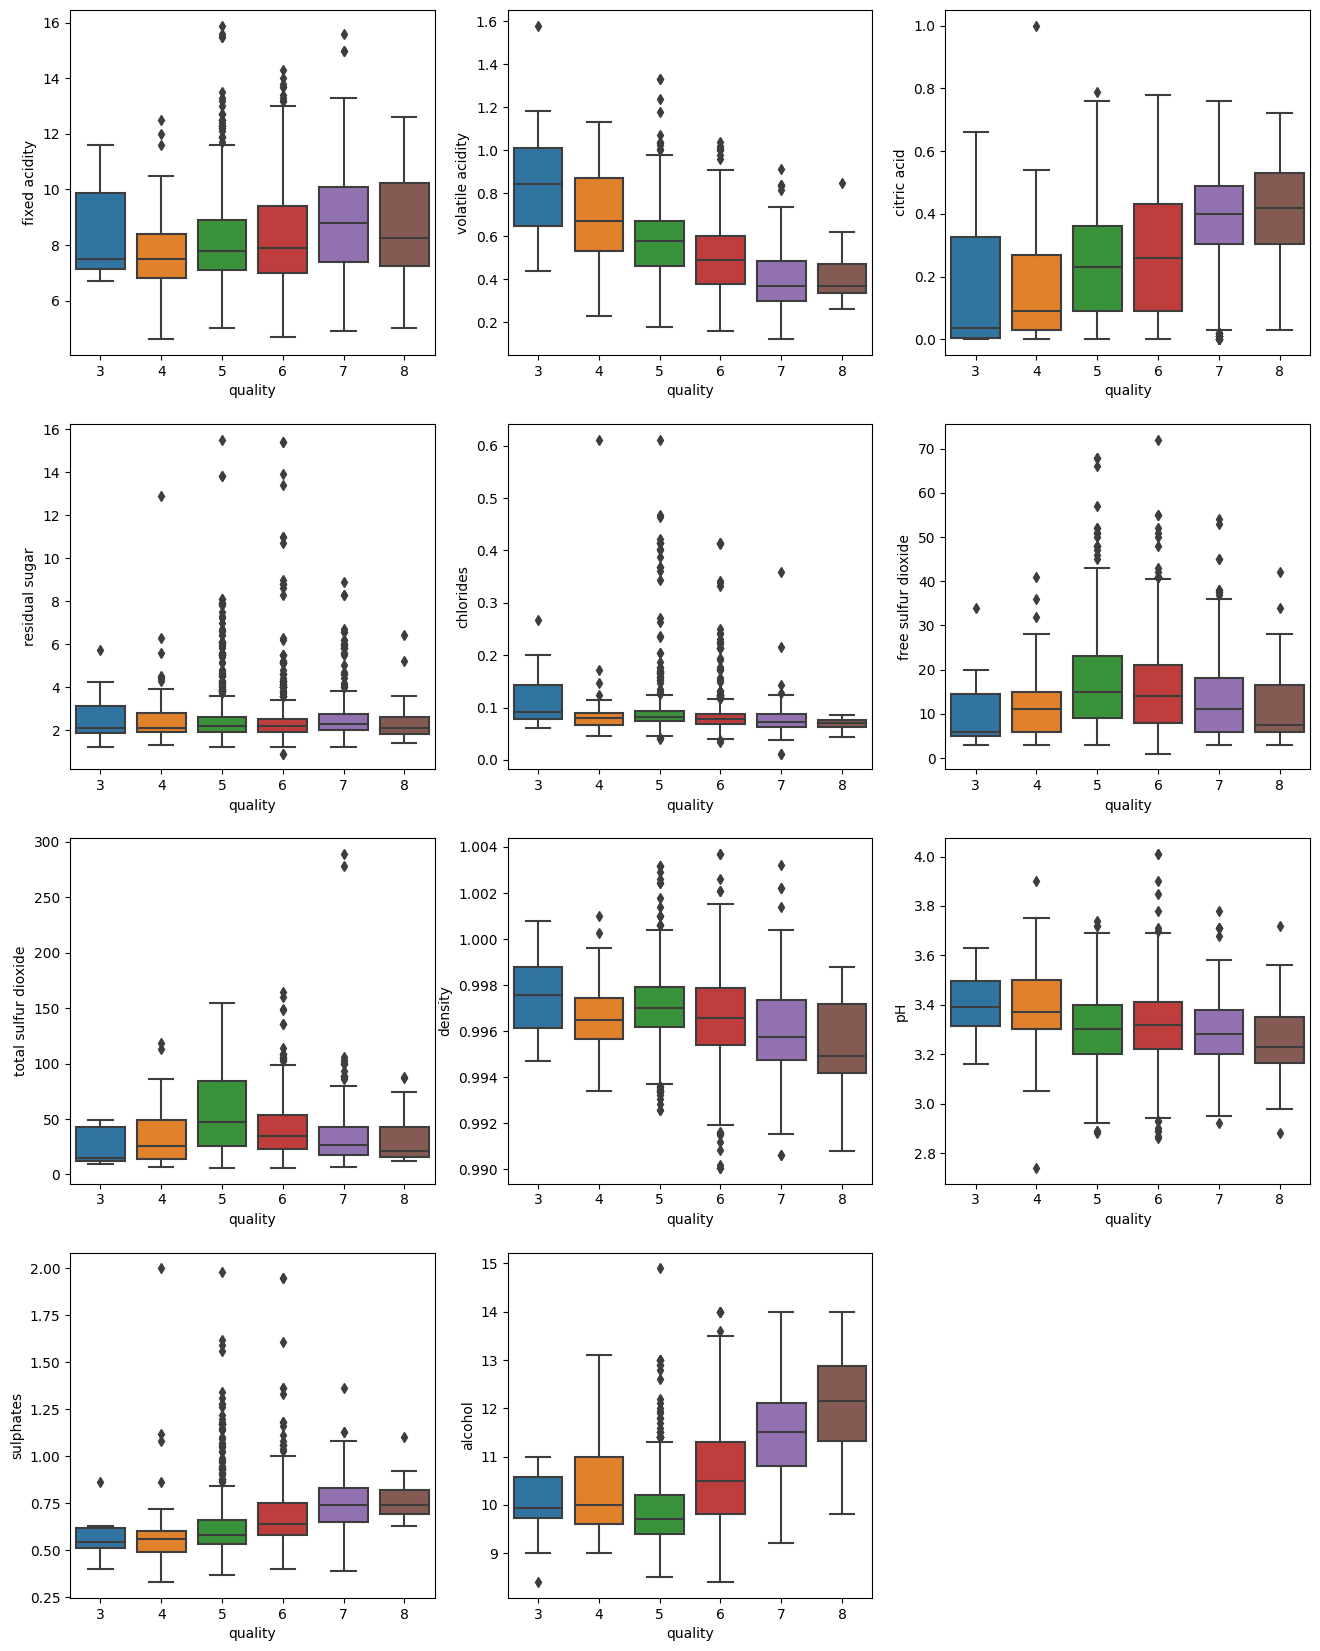

In [15]:
features_ = wine_df.columns[:-1]
fig = plt.figure(figsize=(16,26))
for column, feature in enumerate(features_):
    fig.add_subplot(5,3,column+1)
    sns.boxplot(data=wine_df,x='quality',y=feature)


FEATURE ENGINEERING

In [16]:
from sklearn.ensemble import RandomForestRegressor

In [17]:
rf = RandomForestRegressor()
x=wine_df.drop(['quality'],axis=1)
rf.fit(x, wine_df.quality)

## store information and feature names
features = wine_df.columns
importances = rf.feature_importances_
sorted_index = np.argsort(importances)[:]

In [18]:
sorted_index

array([ 2,  5,  0,  7,  3,  8,  4,  6,  1,  9, 10])

In [19]:
importances

array([0.05082863, 0.13234639, 0.04636707, 0.0553757 , 0.06402108,
       0.04838403, 0.07912723, 0.05172203, 0.06011477, 0.13738468,
       0.27432838])

([<matplotlib.axis.YTick at 0x7a78f1d7ab60>,
 [Text(0, 0, 'citric acid'),
  Text(0, 1, 'free sulfur dioxide'),
  Text(0, 2, 'fixed acidity'),
  Text(0, 3, 'density'),
  Text(0, 4, 'residual sugar'),
  Text(0, 5, 'pH'),
  Text(0, 6, 'chlorides'),
  Text(0, 7, 'total sulfur dioxide'),
  Text(0, 8, 'volatile acidity'),
  Text(0, 9, 'sulphates'),
  Text(0, 10, 'alcohol')])

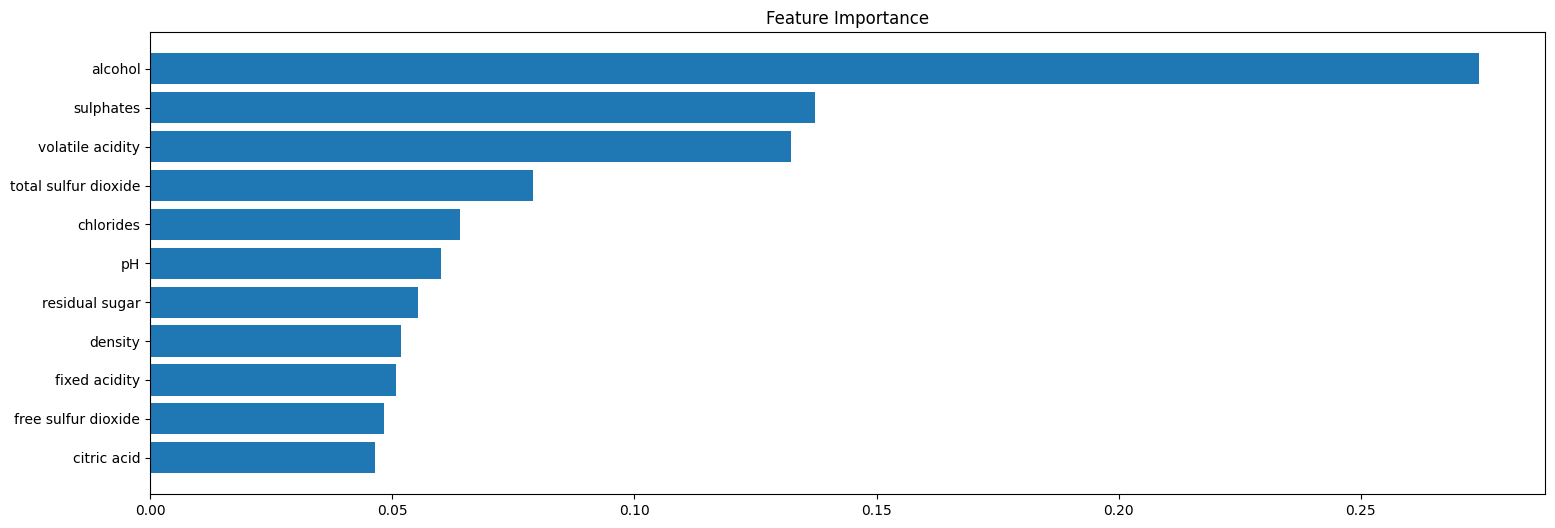

In [20]:
plt.figure(figsize=(18,6))
plt.title('Feature Importance')
plt.barh(range(len(sorted_index)),importances[sorted_index])
plt.yticks(range(len(sorted_index)),[features[i] for i in sorted_index])

<Axes: >

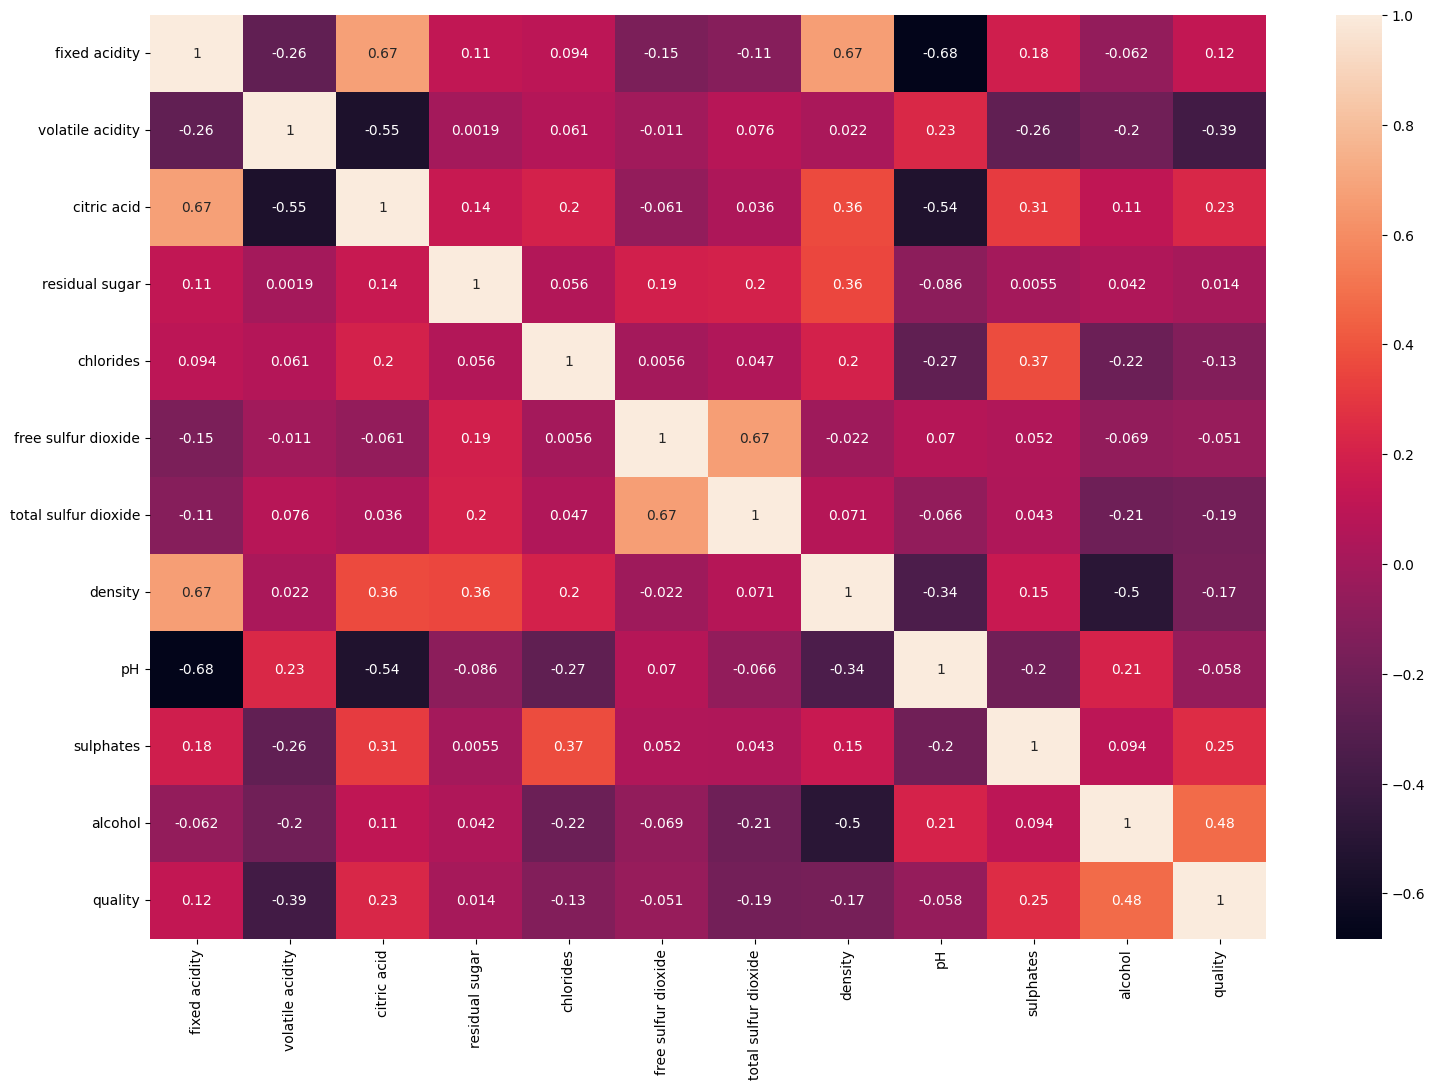

In [21]:
plt.figure(figsize=(18,12))
sns.heatmap(wine_df.corr(),annot=True)


<Axes: >

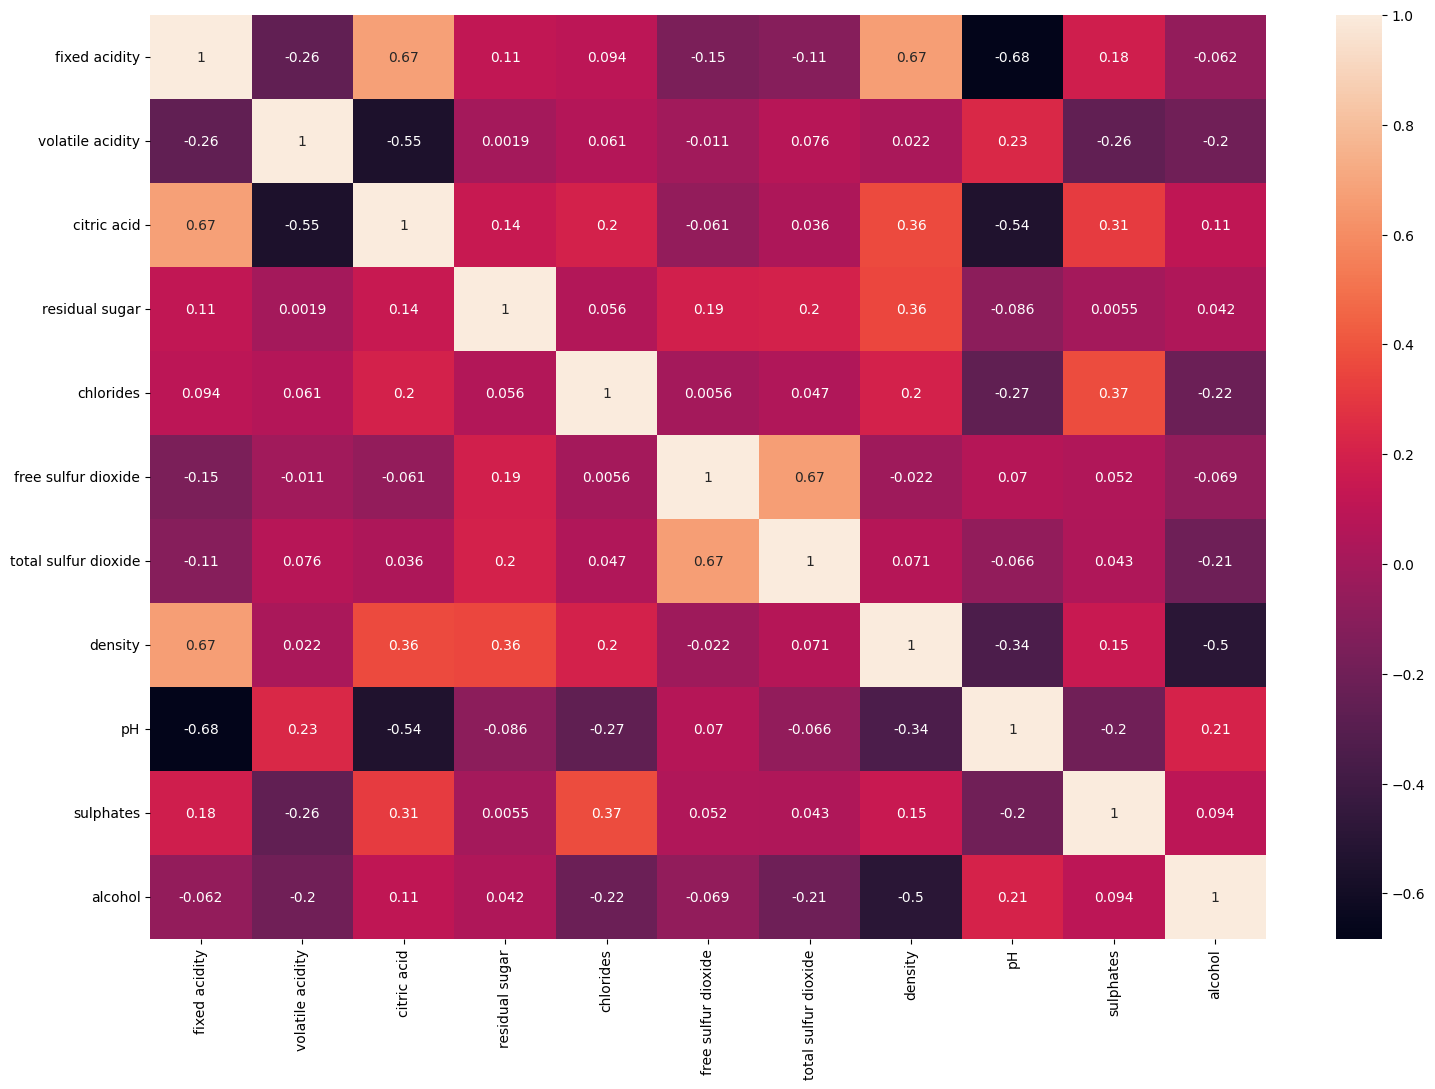

In [22]:
plt.figure(figsize=(18,12))
sns.heatmap(x.corr(),annot=True)

In [23]:
######### HANDLE IMBALANCE DATA
from imblearn.over_sampling import SMOTE

In [24]:
x = wine_df.drop('quality',axis='columns')
y=wine_df['quality']
smote = SMOTE(sampling_strategy='auto')
x_sm,y_sm = smote.fit_resample(x,y)

In [25]:
y_sm.value_counts()

5    681
6    681
7    681
4    681
8    681
3    681
Name: quality, dtype: int64

In [26]:
x_sm

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000
...,...,...,...,...,...,...,...,...,...,...,...
4081,10.894265,0.345910,0.549426,2.559102,0.070204,5.102245,17.329180,0.997353,3.122394,0.667382,10.877306
4082,7.877661,0.373564,0.359043,1.748404,0.064388,4.452130,12.515957,0.995593,3.288085,0.901542,10.822874
4083,8.639321,0.310373,0.480474,2.419661,0.073431,4.962711,15.616948,0.996262,3.177661,0.982237,11.112203
4084,10.965517,0.563666,0.650635,4.777495,0.084944,6.000000,18.647913,0.998377,3.207677,0.730490,13.100726


In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_sm[x_sm.columns] = scaler.fit_transform(x_sm[x_sm.columns])

In [28]:
x_sm

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.593909,0.489013,-1.361803,-0.563640,-0.296208,-0.257534,-0.100945,0.690034,1.207361,-0.631410,-1.124031
1,-0.350400,1.224320,-1.361803,0.018031,0.194271,1.175574,1.055886,0.149291,-0.810530,0.127020,-0.780541
2,-0.350400,0.734115,-1.163712,-0.231256,0.060504,0.151925,0.600165,0.257440,-0.419971,-0.062588,-0.780541
3,1.719423,-1.226703,1.411478,-0.563640,-0.318502,0.356655,0.810498,0.798183,-1.070904,-0.505005,-0.780541
4,-0.593909,0.489013,-1.361803,-0.563640,-0.296208,-0.257534,-0.100945,0.690034,1.207361,-0.631410,-1.124031
...,...,...,...,...,...,...,...,...,...,...,...
4081,1.533300,-0.957457,1.359115,-0.015954,-0.425415,-0.861257,-0.685349,0.448520,-1.315694,0.047268,0.144570
4082,-0.303123,-0.844491,0.416279,-0.689609,-0.555084,-0.927806,-0.854079,-0.503168,-0.237155,1.527221,0.097827
4083,0.160554,-1.102628,1.017645,-0.131824,-0.353493,-0.875541,-0.745372,-0.141794,-0.955942,2.037234,0.346282
4084,1.576676,-0.067916,1.860330,1.827437,-0.096812,-0.769359,-0.639120,1.002311,-0.760559,0.446129,2.053878


In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size=0.2,random_state=42)

In [30]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers import Dropout

In [31]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
y_train = le.fit_transform(y_train)
y_test =le.fit_transform(y_test)


In [32]:
y_train = tensorflow.keras.utils.to_categorical(y_train,6)
y_test = tensorflow.keras.utils.to_categorical(y_test,6)

In [33]:
model= Sequential()
model.add(tensorflow.keras.layers.Input(shape=11,))
model.add(tensorflow.keras.layers.Dense(32,activation='relu'))
model.add(tensorflow.keras.layers.Dense(64,activation='relu'))
model.add(tensorflow.keras.layers.Dropout(0.3))
model.add(tensorflow.keras.layers.Dense(128,activation='relu'))
model.add(tensorflow.keras.layers.Dense(6,activation='softmax'))

In [34]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

In [35]:
model.fit(x_train,y_train,epochs=800,verbose=1)

Epoch 1/800
103/103 [==============================] - 3s 6ms/step - loss: 1.3859 - accuracy: 0.4360
Epoch 2/800
103/103 [==============================] - 0s 2ms/step - loss: 1.0450 - accuracy: 0.5603
Epoch 3/800
103/103 [==============================] - 0s 2ms/step - loss: 0.9513 - accuracy: 0.5976
Epoch 4/800
103/103 [==============================] - 0s 2ms/step - loss: 0.8805 - accuracy: 0.6401
Epoch 5/800
103/103 [==============================] - 0s 2ms/step - loss: 0.8455 - accuracy: 0.6521
Epoch 6/800
103/103 [==============================] - 0s 2ms/step - loss: 0.8020 - accuracy: 0.6720
Epoch 7/800
103/103 [==============================] - 0s 2ms/step - loss: 0.7597 - accuracy: 0.6998
Epoch 8/800
103/103 [==============================] - 0s 2ms/step - loss: 0.7361 - accuracy: 0.7053
Epoch 9/800
103/103 [==============================] - 0s 2ms/step - loss: 0.7179 - accuracy: 0.7108
Epoch 10/800
103/103 [==============================] - 0s 2ms/step - loss: 0.6847 - accura

In [36]:
y_pred = model.predict(x_test)

26/26 [==============================] - 0s 2ms/step


In [37]:
y_pred

array([[5.5016538e-09, 5.5156138e-33, 7.8827083e-02, 9.2117292e-01,
        6.5337670e-30, 9.4562014e-28],
       [2.2669717e-13, 6.8342287e-09, 3.2298616e-01, 6.7701381e-01,
        8.4668406e-10, 1.1338016e-12],
       [2.1086986e-20, 4.8783493e-23, 5.9447206e-08, 2.1851250e-04,
        9.9978137e-01, 2.4278481e-12],
       ...,
       [9.9999553e-01, 9.7733108e-14, 4.3917171e-06, 2.4966197e-18,
        1.3714045e-26, 8.1939017e-28],
       [2.9116652e-18, 9.9971884e-01, 2.8068974e-04, 4.3761361e-07,
        2.9281517e-32, 4.0605004e-32],
       [6.6105396e-17, 2.6553500e-29, 9.9997914e-01, 2.0919781e-05,
        1.3988450e-13, 1.3142442e-12]], dtype=float32)

In [38]:
y_pred = np.argmax(y_pred,axis=1)

In [39]:
y_pred

array([3, 3, 4, 3, 1, 1, 2, 2, 2, 2, 5, 4, 2, 0, 5, 2, 2, 2, 5, 1, 3, 0,
       2, 2, 1, 0, 3, 0, 3, 5, 2, 0, 5, 3, 0, 3, 2, 5, 2, 4, 5, 5, 3, 4,
       4, 1, 4, 1, 1, 5, 3, 3, 2, 3, 2, 0, 1, 4, 1, 3, 4, 1, 3, 0, 5, 1,
       0, 4, 4, 3, 1, 0, 2, 4, 1, 2, 1, 1, 4, 0, 5, 3, 3, 3, 2, 5, 5, 2,
       5, 1, 0, 3, 3, 2, 1, 3, 2, 4, 5, 5, 1, 5, 2, 2, 2, 1, 2, 0, 4, 4,
       2, 1, 4, 3, 3, 1, 0, 5, 1, 2, 2, 2, 3, 2, 3, 4, 3, 4, 2, 0, 4, 4,
       2, 0, 1, 0, 5, 2, 3, 0, 4, 2, 1, 3, 4, 5, 4, 3, 5, 1, 1, 2, 1, 2,
       1, 1, 0, 5, 4, 5, 1, 0, 5, 3, 4, 0, 5, 3, 1, 1, 1, 5, 1, 1, 5, 4,
       1, 0, 3, 1, 1, 3, 5, 5, 4, 4, 3, 4, 3, 3, 4, 3, 3, 4, 2, 1, 1, 0,
       1, 5, 4, 5, 0, 1, 0, 4, 1, 2, 2, 3, 5, 4, 3, 2, 5, 3, 1, 2, 4, 0,
       2, 0, 5, 5, 4, 0, 2, 0, 3, 5, 4, 1, 5, 2, 2, 3, 5, 4, 1, 1, 4, 5,
       0, 1, 2, 3, 1, 3, 3, 4, 1, 3, 3, 5, 1, 4, 2, 1, 2, 2, 1, 4, 0, 3,
       3, 0, 4, 4, 5, 0, 4, 1, 3, 5, 0, 3, 2, 3, 0, 5, 2, 5, 2, 3, 3, 2,
       0, 1, 1, 5, 5, 0, 1, 2, 4, 0, 0, 2, 4, 1, 3,

In [40]:
y_test = np.argmax(y_test,axis=1)

In [41]:
y_test

array([3, 2, 4, 4, 1, 1, 2, 3, 2, 3, 5, 4, 2, 0, 5, 3, 2, 2, 5, 1, 3, 0,
       2, 3, 1, 0, 3, 0, 2, 5, 2, 0, 5, 3, 0, 3, 2, 5, 2, 4, 5, 5, 3, 4,
       4, 2, 4, 2, 1, 5, 3, 3, 2, 3, 3, 0, 1, 4, 1, 3, 3, 1, 3, 0, 5, 1,
       0, 4, 4, 3, 1, 0, 2, 4, 1, 2, 1, 1, 4, 0, 5, 3, 2, 3, 3, 5, 5, 2,
       5, 1, 0, 3, 3, 2, 3, 3, 3, 4, 5, 5, 1, 5, 2, 2, 3, 1, 3, 0, 4, 4,
       3, 1, 4, 3, 2, 3, 0, 5, 1, 2, 2, 2, 3, 2, 3, 4, 2, 4, 2, 0, 4, 4,
       2, 0, 1, 0, 5, 2, 3, 0, 4, 2, 3, 3, 4, 5, 4, 3, 5, 1, 1, 2, 1, 2,
       1, 1, 0, 5, 4, 5, 1, 0, 5, 3, 4, 0, 5, 3, 1, 1, 1, 5, 1, 1, 5, 3,
       3, 0, 3, 1, 1, 2, 5, 5, 4, 4, 2, 4, 2, 4, 2, 3, 2, 4, 3, 1, 1, 0,
       1, 5, 4, 5, 0, 1, 0, 4, 1, 2, 1, 3, 5, 4, 2, 3, 5, 4, 1, 2, 4, 0,
       2, 0, 5, 5, 4, 0, 2, 0, 3, 5, 4, 1, 5, 1, 2, 3, 5, 4, 1, 1, 4, 5,
       0, 1, 3, 3, 1, 2, 3, 4, 1, 3, 3, 5, 1, 4, 2, 1, 2, 2, 1, 4, 0, 3,
       3, 0, 4, 4, 5, 0, 4, 1, 3, 3, 0, 3, 3, 3, 0, 5, 2, 5, 2, 3, 2, 2,
       0, 1, 1, 5, 5, 0, 1, 2, 4, 0, 0, 2, 4, 1, 3,

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       132
           1       0.93      0.95      0.94       131
           2       0.73      0.75      0.74       150
           3       0.72      0.61      0.66       155
           4       0.87      0.90      0.89       116
           5       0.96      1.00      0.98       134

    accuracy                           0.86       818
   macro avg       0.86      0.87      0.86       818
weighted avg       0.85      0.86      0.86       818

